### Part 1
The year 518 is significantly more underground than your history books implied. Either that, or you've arrived in a vast cavern network under the North Pole.

After exploring a little, you discover a long tunnel that contains a row of small pots as far as you can see to your left and right. A few of them contain plants - someone is trying to grow things in these geothermally-heated caves.

The pots are numbered, with 0 in front of you. To the left, the pots are numbered -1, -2, -3, and so on; to the right, 1, 2, 3.... Your puzzle input contains a list of pots from 0 to the right and whether they do (#) or do not (.) currently contain a plant, the initial state. (No other pots currently contain plants.) For example, an initial state of #..##.... indicates that pots 0, 3, and 4 currently contain plants.

Your puzzle input also contains some notes you find on a nearby table: someone has been trying to figure out how these plants spread to nearby pots. Based on the notes, for each generation of plants, a given pot has or does not have a plant based on whether that pot (and the two pots on either side of it) had a plant in the last generation. These are written as LLCRR => N, where L are pots to the left, C is the current pot being considered, R are the pots to the right, and N is whether the current pot will have a plant in the next generation. For example:

    A note like ..#.. => . means that a pot that contains a plant but with no plants within two pots of it will not have a plant in it during the next generation.
    A note like ##.## => . means that an empty pot with two plants on each side of it will remain empty in the next generation.
    A note like .##.# => # means that a pot has a plant in a given generation if, in the previous generation, there were plants in that pot, the one immediately to the left, and the one two pots to the right, but not in the ones immediately to the right and two to the left.

It's not clear what these plants are for, but you're sure it's important, so you'd like to make sure the current configuration of plants is sustainable by determining what will happen after 20 generations.

For example, given the following input:

initial state: #..#.#..##......###...###
```
...## => #
..#.. => #
.#... => #
.#.#. => #
.#.## => #
.##.. => #
.#### => #
#.#.# => #
#.### => #
##.#. => #
##.## => #
###.. => #
###.# => #
####. => #
```
For brevity, in this example, only the combinations which do produce a plant are listed. (Your input includes all possible combinations.) Then, the next 20 generations will look like this:
```
                 1         2         3     
       0         0         0         0     
 0: ...#..#.#..##......###...###...........
 1: ...#...#....#.....#..#..#..#...........
 2: ...##..##...##....#..#..#..##..........
 3: ..#.#...#..#.#....#..#..#...#..........
 4: ...#.#..#...#.#...#..#..##..##.........
 5: ....#...##...#.#..#..#...#...#.........
 6: ....##.#.#....#...#..##..##..##........
 7: ...#..###.#...##..#...#...#...#........
 8: ...#....##.#.#.#..##..##..##..##.......
 9: ...##..#..#####....#...#...#...#.......
10: ..#.#..#...#.##....##..##..##..##......
11: ...#...##...#.#...#.#...#...#...#......
12: ...##.#.#....#.#...#.#..##..##..##.....
13: ..#..###.#....#.#...#....#...#...#.....
14: ..#....##.#....#.#..##...##..##..##....
15: ..##..#..#.#....#....#..#.#...#...#....
16: .#.#..#...#.#...##...#...#.#..##..##...
17: ..#...##...#.#.#.#...##...#....#...#...
18: ..##.#.#....#####.#.#.#...##...##..##..
19: .#..###.#..#.#.#######.#.#.#..#.#...#..
20: .#....##....#####...#######....#.#..##.
```
The generation is shown along the left, where 0 is the initial state. The pot numbers are shown along the top, where 0 labels the center pot, negative-numbered pots extend to the left, and positive pots extend toward the right. Remember, the initial state begins at pot 0, which is not the leftmost pot used in this example.

After one generation, only seven plants remain. The one in pot 0 matched the rule looking for ..#.., the one in pot 4 matched the rule looking for .#.#., pot 9 matched .##.., and so on.

In this example, after 20 generations, the pots shown as # contain plants, the furthest left of which is pot -2, and the furthest right of which is pot 34. Adding up all the numbers of plant-containing pots after the 20th generation produces 325.

After 20 generations, what is the sum of the numbers of all pots which contain a plant?

In [1]:
from pathlib import Path
import itertools
from collections import Counter
from collections import defaultdict
from pprint import pprint
import re
from datetime import datetime
import numpy as np
import functools
from copy import copy

In [2]:
lines = Path('input.txt').read_text().strip().split('\n')

In [3]:
init_state = lines[0][15:]

In [4]:
yields = dict()
for l in lines[2:]:
    k,v = l.split(' => ')
    yields[k] = v

In [5]:
state = init_state
generation = 0
pots_front = 0
pots_back = 0
for generation in range(20):
    #expand state
    first_plant = state.find('#')
    add_front = max(5 - first_plant, 0)
    state = '.'*add_front + state
    pots_front += add_front
    
    last_plant = state[::-1].find('#')
    add_back = max(5 - last_plant, 0)
    state = state + '.'*add_back
    pots_back += add_back
    
    next_state = ['.']*len(state)
    for i in range(len(state)-5):
        next_state[i+2] = yields[state[i:i+5]]
    state = ''.join(next_state)
    
total = 0    
for i,pot in enumerate(state, start=-pots_front):
    if pot == "#":
        total += i
total

2166

### Part 2
You realize that 20 generations aren't enough. After all, these plants will need to last another 1500 years to even reach your timeline, not to mention your future.

After fifty billion (50000000000) generations, what is the sum of the numbers of all pots which contain a plant?

In [6]:
from matplotlib import pyplot as plt

In [7]:
state = init_state
generation = 0
pots_front = 0
pots_back = 0
gen_sums = []
for generation in range(1000):
    #expand state
    first_plant = state.find('#')
    add_front = max(5 - first_plant, 0)
    state = '.'*add_front + state
    pots_front += add_front
    
    last_plant = state[::-1].find('#')
    add_back = max(5 - last_plant, 0)
    state = state + '.'*add_back
    pots_back += add_back
    
    next_state = ['.']*len(state)
    for i in range(len(state)-5):
        next_state[i+2] = yields[state[i:i+5]]
    state = ''.join(next_state)
    
    gen_total = sum(i if pot == '#' else 0 for i,pot in enumerate(state, start=-pots_front))
    gen_sums.append(gen_total)

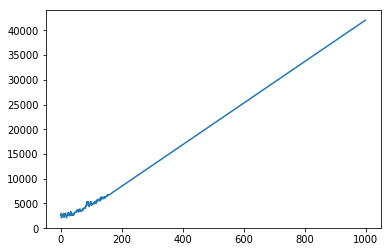

In [8]:
fig, ax = plt.subplots()
ax.plot(gen_sums)
plt.show()

In [9]:
gen_sums[999] - gen_sums[998] #42 * (999-998)

42

In [10]:
#gen_sums[49999999999] = gen_sums[999] + 42 * (49999999999 - 999)
gen_sums[999] + 42 * (49999999999 - 999)

2100000000061